Необхідні бібліотеки: urllib, pandas, numpy, timeit
(Також потрібно створити підкаталог "csv" для завантаження даних)

In [2]:
!pip install pandas
!pip install urllib 
!pip install IPython
!pip install numpy
!pip install timeit
!pip install scipy 
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for urllib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement timeit (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for timeit



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Завдання першого рівня**

Завантаження файлу

In [3]:
import urllib.request
import zipfile
import os

def download_and_extract(url, extract_to='.'): 
    zip_path = "data.zip"
    urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_names = zip_ref.namelist()
    for i in file_names:
        if os.path.exists(os.path.join(extract_to, i)):  
            print("Файл з архіва вже існує")
            os.remove(zip_path)
            return  
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    os.remove(zip_path)
    print(f"Архів розпакований у {extract_to}")

url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
output_folder = "./data" 
os.makedirs(output_folder, exist_ok=True)
download_and_extract(url, output_folder)

KeyboardInterrupt: 

Створення датафрейму та виконання завдань з Pandas

In [22]:
import pandas as pd
import timeit
from IPython.display import display

file_path = "./data/household_power_consumption.txt"

def pandas_df_filter():
    
    df = pd.read_csv(file_path, delimiter=';', na_values='?', header=0, dtype={
        "Date": str,
        "Time": str,
        "Global_active_power": float,
        "Global_reactive_power": float,
        "Voltage": float,
        "Global_intensity": float,
        "Sub_metering_1": float,
        "Sub_metering_2": float,
        "Sub_metering_3": float
    })

    # Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.
    high_power = df[(df["Global_active_power"] > 5)]
    print("Завдання 1")
    print("---")
    display(high_power)
    print("---")
    # Обрати всі записи, у яких вольтаж перевищую 235 В.
    high_voltage = df[(df["Voltage"] > 235)]
    print("Завдання 2")
    print("---")
    display(high_voltage)
    print("---")

    # Обрати всі записи, у яких сила струму лежить в межах 19-20 А, 
    # для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.
    current_range = df[(df["Global_intensity"] >= 19) & (df["Global_intensity"] <= 20)]
    current_range = current_range[(current_range["Sub_metering_2"] > current_range["Sub_metering_3"])]
    print("Завдання 3")
    print("---")
    display(current_range)
    print("---")

    # Обрати випадковим чином 500000 записів (без повторів елементів вибірки), 
    # для них обчислити середні величини усіх 3-х груп споживання електричної енергії
    sample = df.sample(n=500000, replace=False)
    mean1 = sample["Sub_metering_1"].mean()
    mean2 = sample["Sub_metering_2"].mean()
    mean3 = sample["Sub_metering_3"].mean()
    print("Завдання 4")
    print("---")
    print(f"Група 1: {mean1:.3f}")
    print(f"Група 2: {mean2:.3f}")
    print(f"Група 3: {mean3:.3f}")
    print("---")
    
    # Обрати ті записи, які після 18-00 споживають понад 6 кВт за
    # хвилину в середньому, серед відібраних визначити ті, 
    # у яких основне споживання електроенергії у вказаний проміжок часу
    # припадає на пральну машину, сушарку, холодильник та освітлення
    # (група 2 є найбільшою), а потім обрати кожен третій результат із
    # першої половини та кожен четвертий результат із другої половини.
    after_18 = df[(pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour >= 18)]
    after_18 = after_18[(after_18["Global_active_power"] > 6)]
    after_18 = after_18[(after_18["Sub_metering_2"] == after_18[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].max(axis=1))]
    after_18filtered = pd.concat([after_18.iloc[:len(after_18)//2:3], after_18.iloc[len(after_18)//2::4]])
    print("Завдання 5")
    print("---")
    display(after_18filtered)
    print("---")

time = timeit.timeit(pandas_df_filter, number=1)
print(f"Час виконання: {time:.4f} с")

Завдання 1
---


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,16/12/2006,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,16/12/2006,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...
2069356,22/11/2010,18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2069357,22/11/2010,18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2071586,24/11/2010,07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2071587,24/11/2010,07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


---
Завдання 2
---


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


---
Завдання 3
---


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,16/12/2006,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,17/12/2006,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,17/12/2006,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,17/12/2006,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,17/12/2006,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2071589,24/11/2010,07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2071590,24/11/2010,07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2071591,24/11/2010,07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2071592,24/11/2010,07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


---
Завдання 4
---
Група 1: 1.122
Група 2: 1.292
Група 3: 6.488
---
Завдання 5
---


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
41,16/12/2006,18:05:00,6.052,0.192,232.93,26.2,0.0,37.0,17.0
44,16/12/2006,18:08:00,6.308,0.116,232.25,27.0,0.0,36.0,17.0
17494,28/12/2006,20:58:00,6.386,0.374,236.63,27.0,1.0,36.0,17.0
17498,28/12/2006,21:02:00,8.088,0.262,235.50,34.4,1.0,72.0,17.0
17501,28/12/2006,21:05:00,7.230,0.152,235.22,30.6,1.0,73.0,17.0
...,...,...,...,...,...,...,...,...,...
2066466,20/11/2010,18:30:00,6.620,0.314,229.00,29.2,18.0,34.0,16.0
2066470,20/11/2010,18:34:00,6.266,0.360,229.82,27.6,14.0,35.0,16.0
2066474,20/11/2010,18:38:00,6.302,0.376,229.65,27.8,15.0,34.0,17.0
2066478,20/11/2010,18:42:00,6.238,0.344,229.37,27.6,14.0,35.0,16.0


---
Час виконання: 4.0411 с


Створення датафрейму та виконання завдань з Numpy

In [ ]:
import numpy as np
import timeit
from IPython.display import display

file_path = "./data/household_power_consumption.txt"

def numpy_array_filter():

    types = [("Date", "U10"), ("Time", "U8"), ("Global_active_power", "float64"),
                ("Global_reactive_power", "float64"), ("Voltage", "float64"),
                ("Global_intensity", "float64"), ("Sub_metering_1", "float64"),
                ("Sub_metering_2", "float64"), ("Sub_metering_3", "float64")]
    npdf = np.genfromtxt(file_path, missing_values=["?", np.nan], delimiter=';', dtype=types, encoding="UTF-8", names=True)
    # Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.
    high_power = npdf[npdf["Global_active_power"] > 5]
    print("Завдання 1")
    print("---")
    print(high_power)
    print("---")

    # Обрати всі записи, у яких вольтаж перевищую 235 В.
    high_voltage = npdf[npdf["Voltage"] > 235]
    print("Завдання 2")
    print("---")
    print(high_voltage)
    print("---")
    # Обрати всі записи, у яких сила струму лежить в межах 19-20 А, 
    # для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.
    current_range = npdf[(npdf["Global_intensity"] >= 19) & (npdf["Global_intensity"] <= 20)]
    current_range = current_range[current_range["Sub_metering_2"] > current_range["Sub_metering_3"]]
    print("Завдання 3")
    print("---")
    print(current_range)
    print("---")

    # Обрати випадковим чином 500000 записів (без повторів елементів вибірки), 
    # для них обчислити середні величини усіх 3-х груп споживання електричної енергії
    sample = np.random.choice(npdf, 500000, replace=False)
    mean1 = np.nanmean(sample["Sub_metering_1"])
    mean2 = np.nanmean(sample["Sub_metering_2"])
    mean3 = np.nanmean(sample["Sub_metering_3"])
    print("Завдання 4")
    print("---")
    print(f"Група 1: {mean1:.3f}")
    print(f"Група 2: {mean2:.3f}")
    print(f"Група 3: {mean3:.3f}")
    print("---")

    # Обрати ті записи, які після 18-00 споживають понад 6 кВт за
    # хвилину в середньому, серед відібраних визначити ті, 
    # у яких основне споживання електроенергії у вказаний проміжок часу
    # припадає на пральну машину, сушарку, холодильник та освітлення
    # (група 2 є найбільшою), а потім обрати кожен третій результат із
    # першої половини та кожен четвертий результат із другої половини.
    times = np.array([int(t[:2]) for t in npdf["Time"]])
    after_18 = npdf[times >= 18]
    after_18 = after_18[after_18["Global_active_power"] > 6]
    after_18 = after_18[(after_18["Sub_metering_2"] > after_18["Sub_metering_1"]) & (after_18["Sub_metering_2"] > after_18["Sub_metering_3"])]
    after_18filtered = np.concatenate([after_18[:len(after_18)//2:3], after_18[len(after_18)//2::4]])
    print("Завдання 5")
    print("---")
    print(after_18filtered)
    print("---")

time = timeit.timeit(numpy_array_filter, number=1)
print(f"Час виконання: {time:.4f} с")

Завдання 1
---
[('16/12/2006', '17:25:00',  5.36 , 0.436, 233.63, 23. ,  0.,  1., 16.) ('16/12/2006', '17:26:00',  5.374, 0.498, 233.29, 23. ,  0.,  2., 17.) ('16/12/2006', '17:27:00',  5.388, 0.502, 233.74, 23. ,  0.,  1., 17.) ('16/12/2006', '17:35:00',  5.412, 0.47 , 232.78, 23.2,  0.,  1., 17.) ('16/12/2006', '17:36:00',  5.224, 0.478, 232.99, 22.4,  0.,  1., 16.) ('16/12/2006', '17:37:00',  5.268, 0.398, 232.91, 22.6,  0.,  2., 17.) ('16/12/2006', '17:44:00',  5.894, 0.   , 232.69, 25.4,  0.,  0., 16.) ('16/12/2006', '17:45:00',  7.706, 0.   , 230.98, 33.2,  0.,  0., 17.) ('16/12/2006', '17:46:00',  7.026, 0.   , 232.21, 30.6,  0.,  0., 16.) ('16/12/2006', '17:47:00',  5.174, 0.   , 234.19, 22. ,  0.,  0., 17.) ('16/12/2006', '18:05:00',  6.052, 0.192, 232.93, 26.2,  0., 37., 17.) ('16/12/2006', '18:06:00',  6.752, 0.186, 232.12, 29. ,  0., 36., 17.) ('16/12/2006', '18:07:00',  6.474, 0.144, 231.85, 27.8,  0., 37., 16.) ('16/12/2006', '18:08:00',  6.308, 0.116, 232.25, 27. ,  0., 

KeyboardInterrupt: 

**Висновки**

Pandas та Numpy виконують одне й те саме завдання успішно.
Середній час виконання завдання з Pandas: 4.3 секунди
Середній час виконання завдання з Numpy: 8 секунд

Pandas dataframe має більшу зручність для виконання саме цього завдання: робота з виборками даних, а також має сумісність з IPython.display для більш організованого виводу, але фукнції для обробки виборок підтримують лише цей тип даних.

Тоді як Numpy array має більшу гнучкість у роботі з іншими типами даних, але працює повільніше з великими обрахунками(вибір випадкових строк) та має менш організований вивід великих даних.

Зручність Pandas: 4 з 5

Зручність Numpy: 2 з 5

**Завдання другого рівня**

Завантаження файлу

In [ ]:
url = "https://archive.ics.uci.edu/static/public/360/air+quality.zip"
output_folder = "./data" 
download_and_extract(url, output_folder)

Архів розпакований у ./data


Приведення файлу у вигляд для коректного читання

In [20]:
import re

def clean(file_path, output_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    cleaned_lines = []
    for line in lines:
        cline = re.sub(r';{2,}', '', line)
        cline = cline.replace(",", ".")
        if cline.strip() != "":
            cleaned_lines.append(cline)

    with open(output_path, 'w', encoding='utf-8') as f:
        f.writelines(cleaned_lines)

input_file = "./data/AirQualityUCI.csv"
output_file = "./data/AirQualityUCIClean.csv"
clean(input_file, output_file)

Створення датафрейму та виконання завдань з Pandas

Завдання 1
---
Дані до чистки:


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,30/03/2005,16.00.00,1.7,1123.0,NaN,9.2,945.0,227.0,623.0,135.0,1303.0,856.0,25.1,28.5,0.8932
9239,30/03/2005,17.00.00,3.2,1271.0,NaN,16.1,1183.0,403.0,493.0,179.0,1498.0,1258.0,24.1,32.1,0.9504
9240,30/03/2005,18.00.00,3.4,1304.0,NaN,17.1,1212.0,444.0,476.0,183.0,1585.0,1383.0,21.5,39.1,0.9914
9241,30/03/2005,19.00.00,4.2,1360.0,NaN,19.9,1295.0,475.0,451.0,193.0,1639.0,1518.0,19.3,46.2,1.0230


---
Дані після чистки:


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,30/03/2005,16.00.00,1.7,1123.0,0.0,9.2,945.0,227.0,623.0,135.0,1303.0,856.0,25.1,28.5,0.8932
9239,30/03/2005,17.00.00,3.2,1271.0,0.0,16.1,1183.0,403.0,493.0,179.0,1498.0,1258.0,24.1,32.1,0.9504
9240,30/03/2005,18.00.00,3.4,1304.0,0.0,17.1,1212.0,444.0,476.0,183.0,1585.0,1383.0,21.5,39.1,0.9914
9241,30/03/2005,19.00.00,4.2,1360.0,0.0,19.9,1295.0,475.0,451.0,193.0,1639.0,1518.0,19.3,46.2,1.0230


---
Завдання 2
---
Нормалізація


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.218487,0.666667,0.126156,0.186813,0.472448,0.112238,0.393589,0.332353,0.609730,0.502576,0.333333,0.551297,0.339668
1,0.168067,0.633333,0.094197,0.147567,0.431346,0.069642,0.437570,0.270588,0.561802,0.385256,0.326882,0.537768,0.325190
2,0.184874,0.687255,0.074012,0.141287,0.424119,0.088573,0.424898,0.335294,0.560360,0.425684,0.296774,0.608794,0.336262
3,0.184874,0.674510,0.067283,0.144427,0.428184,0.116295,0.407007,0.358824,0.570811,0.476813,0.277419,0.676437,0.352622
4,0.134454,0.623529,0.042893,0.102041,0.377597,0.088573,0.449124,0.341176,0.536937,0.439952,0.281720,0.671928,0.353563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0.142857,0.550490,0.000000,0.144427,0.426829,0.153482,0.232203,0.397059,0.469550,0.339279,0.580645,0.321308,0.400359
9239,0.268908,0.623039,0.000000,0.252747,0.534327,0.272481,0.183750,0.526471,0.539820,0.498613,0.559140,0.361894,0.425997
9240,0.285714,0.639216,0.000000,0.268446,0.547425,0.300203,0.177413,0.538235,0.571171,0.548157,0.503226,0.440812,0.444375
9241,0.352941,0.666667,0.000000,0.312402,0.584914,0.321163,0.168095,0.567647,0.590631,0.601665,0.455914,0.520857,0.458539


---
Стандартизація


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.530745,0.998347,1.400842,0.283671,0.442276,-0.175820,0.845380,0.323077,0.652268,0.642352,-0.426764,0.076520,-0.520350
1,0.146102,0.773630,0.986142,-0.046489,0.157347,-0.467592,1.238070,-0.017314,0.351166,-0.033230,-0.458685,0.014984,-0.593082
2,0.274316,1.137143,0.724226,-0.099315,0.107250,-0.337915,1.124922,0.339286,0.342111,0.199572,-0.607650,0.338046,-0.537463
3,0.274316,1.051222,0.636921,-0.072902,0.135429,-0.148032,0.965183,0.468958,0.407764,0.493998,-0.703412,0.645724,-0.455274
4,-0.110327,0.707537,0.320439,-0.429475,-0.215253,-0.337915,1.341234,0.371704,0.194956,0.281737,-0.682132,0.625212,-0.450545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,-0.046220,0.215142,-0.236132,-0.072902,0.126036,0.106691,-0.595593,0.679676,-0.228397,-0.297986,0.796873,-0.969584,-0.215462
9239,0.915388,0.704232,-0.236132,0.838340,0.871236,0.921802,-1.028218,1.392875,0.213067,0.619528,0.690470,-0.784977,-0.086662
9240,1.043603,0.813286,-0.236132,0.970404,0.962038,1.111685,-1.084792,1.457712,0.410028,0.904825,0.413821,-0.426020,0.005661
9241,1.556460,0.998347,-0.236132,1.340184,1.221919,1.255256,-1.167989,1.619802,0.532280,1.212945,0.179734,-0.061935,0.076816


---
Завдання 3
---


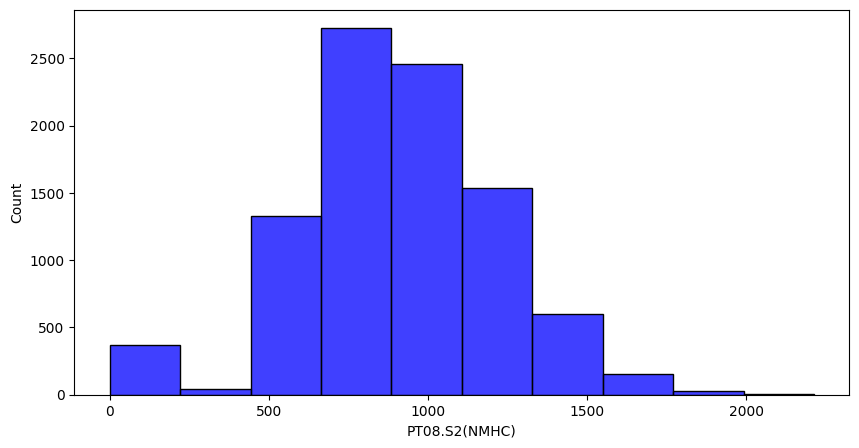

---
Завдання 4
---


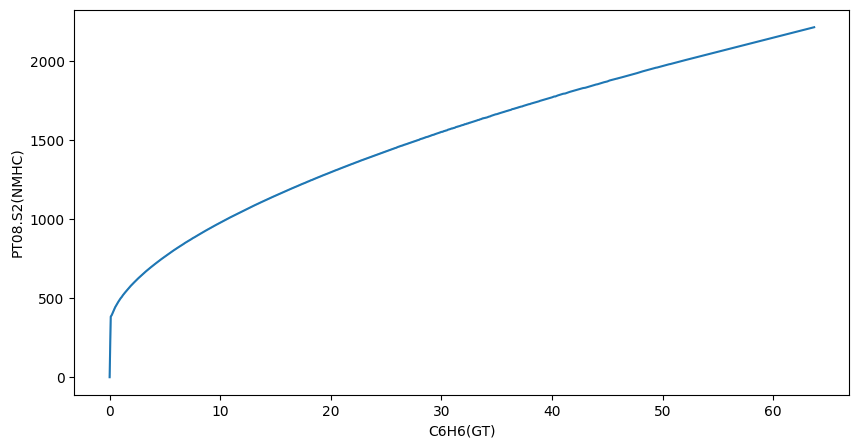

---
Завдання 5
---
Пірсон:  0.9224817488432079
Спірмен:  0.9014681234142263
---
Завдання 6
---


,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,Time_14.00.00,Time_15.00.00,Time_16.00.00,Time_17.00.00,Time_18.00.00,Time_19.00.00,Time_20.00.00,Time_21.00.00,Time_22.00.00,Time_23.00.00
0,10/03/2004,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10/03/2004,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10/03/2004,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10/03/2004,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10/03/2004,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,30/03/2005,1.7,1123.0,0.0,9.2,945.0,227.0,623.0,135.0,1303.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9239,30/03/2005,3.2,1271.0,0.0,16.1,1183.0,403.0,493.0,179.0,1498.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9240,30/03/2005,3.4,1304.0,0.0,17.1,1212.0,444.0,476.0,183.0,1585.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9241,30/03/2005,4.2,1360.0,0.0,19.9,1295.0,475.0,451.0,193.0,1639.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


---
Завдання 7
---


<Figure size 1000x500 with 0 Axes>

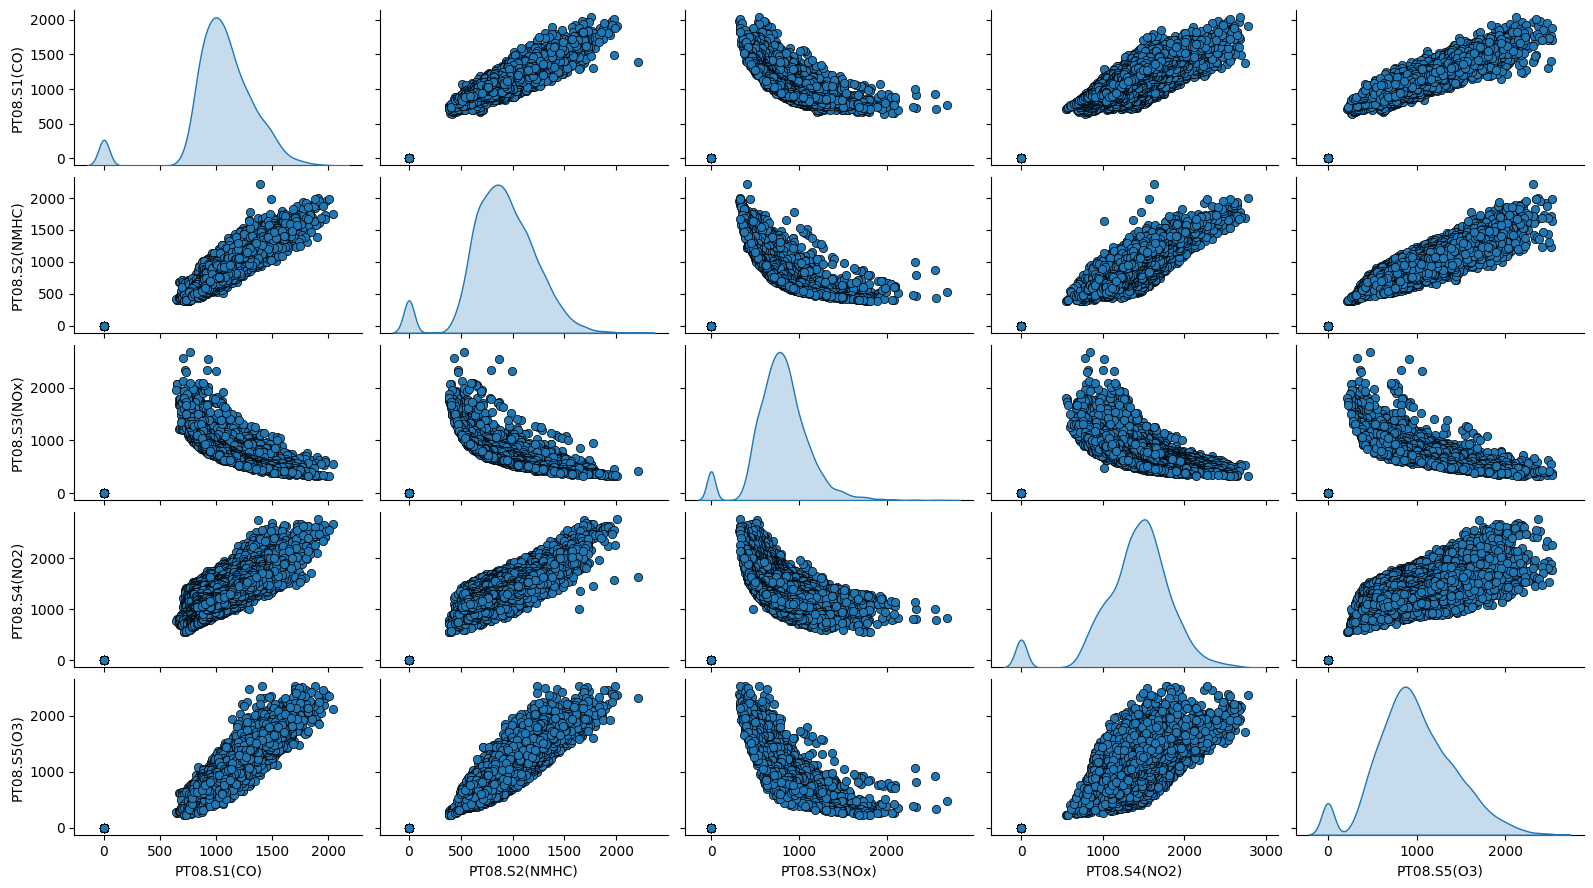

---
Час виконання: 7.5874 с


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder

file_path = "./data/AirQualityUCIClean.csv"

def pandas_df_filter2():

    df = pd.read_csv(file_path, delimiter=';', decimal=",", header=0, skipfooter=114, engine='python', dtype = {
        "Date": str,
        "Time": str,
        "CO(GT)": float,
        "PT08.S1(CO)": int,
        "NMHC(GT)": int,
        "C6H6(GT)": float,
        "PT08.S2(NMHC)": int,
        "NOx(GT)": int,
        "PT08.S3(NOx)": int,
        "NO2(GT)": int,
        "PT08.S4(NO2)": int,
        "PT08.S5(O3)": int,
        "T": float,
        "RH": float,
        "AH": float,
    })
    df.replace(-200, np.nan, inplace=True)
    
    # 1. Поборотися із зниклими даними.
    print("Завдання 1")
    print("---")
    print("Дані до чистки:")
    display(df)
    print("---")
    print("Дані після чистки:")
    df = df.fillna(0)
    display(df)
    print("---")
    # 2. Пронормувати вибраний датасет або стандартизувати його
    # (нормування і стандартизація мають бути реалізовані як окремі
    # функції без застосування додаткових бібліотек).
    df_normalized = normalize_pandas(df.select_dtypes(include=['number'])) 
    df_standardized = standardize_pandas(df.select_dtypes(include=['number'])) 
    print("Завдання 2")
    print("---")
    print("Нормалізація")
    display(df_normalized)
    print("---")
    print("Стандартизація")
    display(df_standardized)
    print("---")
    # 3. Збудувати гістограму по одному із атрибутів, що буде показувати на
    # кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
    print("Завдання 3")
    print("---")
    plot_histogram_pandas(df, "PT08.S2(NMHC)")
    print("---")
    # 4. Збудувати графік залежності одного integer/real атрибута від іншого.
    print("Завдання 4")
    print("---")
    plot_linear_pandas(df, "C6H6(GT)", "PT08.S2(NMHC)")
    print("---")
    # 5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.
    pearson_corr, spearman_corr = calculate_correlations_pandas(df["PT08.S1(CO)"], df["PT08.S2(NMHC)"])
    print("Завдання 5")
    print("---")
    print("Пірсон: ", pearson_corr)
    print("Спірмен: ", spearman_corr)
    print("---")
    # 6. Провести One Hot Encoding категоріального string атрибуту.
    df_encoded = df
    df_encoded = one_hot_encode_pandas(df_encoded, "Time")
    print("Завдання 6")
    print("---")
    display(df_encoded)
    print("---")
    # 7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі
    print("Завдання 7")
    print("---")
    cols = ["PT08.S1(CO)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)"]
    plt.figure(figsize=(10, 5))
    sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))
    plt.show()
    print("---")

def normalize_pandas(data):
    return (data - data.min()) / (data.max() - data.min())

def standardize_pandas(data):
    return (data - data.mean()) / data.std()

def plot_histogram_pandas(df, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=10, color="blue")
    plt.show()

def plot_linear_pandas(df, col1, col2):
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x=col1, y=col2)
    plt.show()

def calculate_correlations_pandas(col1, col2):
    pearson_corr, pearson_pval = pearsonr(col1, col2)
    spearman_corr, spearman_pval = spearmanr(col1, col2)
    return pearson_corr, spearman_corr

def one_hot_encode_pandas(df, column):
    categorical_column = df[[column]]
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    encoded_data = encoder.fit_transform(categorical_column)
    column_names = encoder.get_feature_names_out([column])
    encoded_df = pd.DataFrame(encoded_data, columns=column_names)
    df = df.drop(columns=[column]).join(encoded_df)
    return df

time = timeit.timeit(pandas_df_filter2, number=1)
print(f"Час виконання: {time:.4f} с")

Створення датафрейму та виконання завдань з Numpy

Завдання 1
---
Дані до чистки:
[('10/03/2004', '18.00.00', 2.6, 1360.,  150., 11.9, 1046., 166., 1056., 113., 1692., 1268., 13.6, 48.9, 0.7578)
 ('10/03/2004', '19.00.00', 2. , 1292.,  112.,  9.4,  955., 103., 1174.,  92., 1559.,  972., 13.3, 47.7, 0.7255)
 ('10/03/2004', '20.00.00', 2.2, 1402.,   88.,  9. ,  939., 131., 1140., 114., 1555., 1074., 11.9, 54. , 0.7502)
 ...
 ('04/04/2005', '12.00.00', 2.4, 1142., -200., 12.4, 1063., 293.,  603., 175., 1241., 1092., 26.9, 18.3, 0.6406)
 ('04/04/2005', '13.00.00', 2.1, 1003., -200.,  9.5,  961., 235.,  702., 156., 1041.,  770., 28.3, 13.5, 0.5139)
 ('04/04/2005', '14.00.00', 2.2, 1071., -200., 11.9, 1047., 265.,  654., 168., 1129.,  816., 28.5, 13.1, 0.5028)]
---
Дані після чистки:
[('10/03/2004', '18.00.00', 2.6, 1360., 150., 11.9, 1046., 166., 1056., 113., 1692., 1268., 13.6, 48.9, 0.7578)
 ('10/03/2004', '19.00.00', 2. , 1292., 112.,  9.4,  955., 103., 1174.,  92., 1559.,  972., 13.3, 47.7, 0.7255)
 ('10/03/2004', '20.00.00', 2.2, 1402.

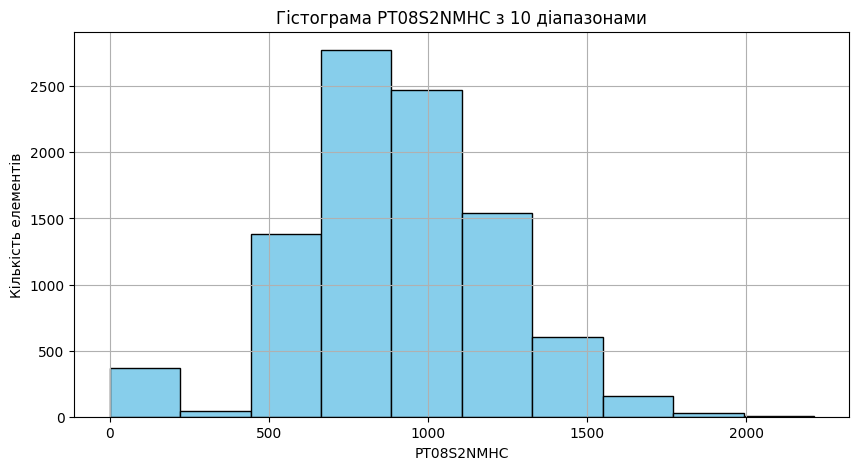

---
Завдання 4
---


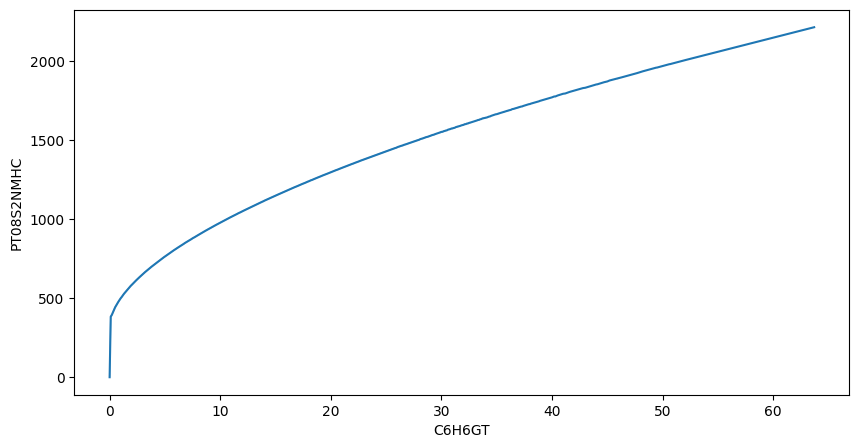

---
Завдання 5
---
Пірсон:  0.9220932708330807
Спірмен:  0.901951668174528
---

Завдання 6
---
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 

C:\Users\andre\AppData\Local\Temp\ipykernel_24172\1614883417.py:146: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.
  df = np.core.records.fromarrays(list(df.values()), names=','.join(newcols))


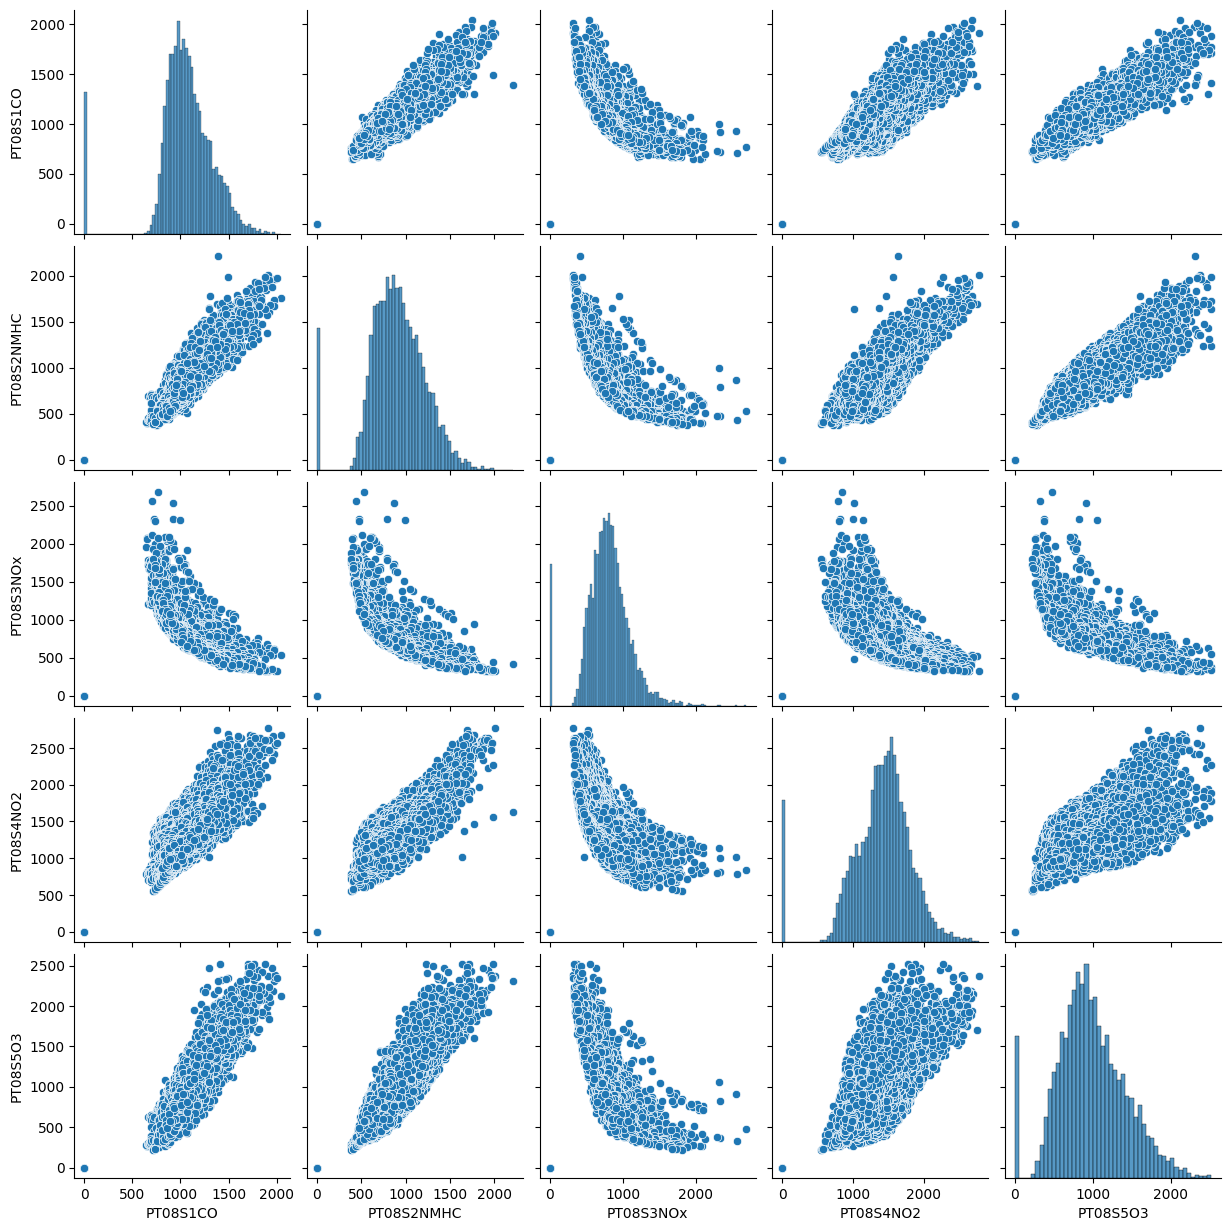

---
Час виконання: 7.2181 с


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import timeit
import re

file_path = "./data/AirQualityUCIClean.csv"

def numpy_array_filter2():
    types = [
    ("Date", "U10"), 
    ("Time", "U8"), 
    ("CO(GT)", "float64"), 
    ("PT08.S1(CO)", "float64"), 
    ("NMHC(GT)", "float64"), 
    ("C6H6(GT)", "float64"), 
    ("PT08.S2(NMHC)", "float64"), 
    ("NOx(GT)", "float64"), 
    ("PT08.S3(NOx)", "float64"), 
    ("NO2(GT)", "float64"), 
    ("PT08.S4(NO2)", "float64"), 
    ("PT08.S5(O3)", "float64"), 
    ("T", "float64"), 
    ("RH", "float64"), 
    ("AH", "float64")
    ]
    data = np.genfromtxt(file_path, missing_values=["-200"], delimiter=';', dtype=types, encoding="UTF=8", names=True)
    # 1. Поборотися із зниклими даними.
    print("Завдання 1")
    print("---")
    print("Дані до чистки:")
    print(data)
    print("---")
    print("Дані після чистки:")
    clean_data = data
    for name in data.dtype.names:
        if clean_data[name].dtype.kind in 'fi':
            clean_data[name][clean_data[name] == -200] = 0
    print(clean_data)
    print("---")

    # 2. Пронормувати вибраний датасет або стандартизувати його
    numerical_columns = [name for name in data.dtype.names if data[name].dtype.kind in {'i', 'f'}]
    num_data = np.column_stack([data[col] for col in numerical_columns])
    norm_data = normalize_numpy(num_data)
    stand_data = standardize_numpy(num_data)
    print("Завдання 2")
    print("---")
    print("Нормалізація")
    print(norm_data)
    print("---")
    print("Стандартизація")
    print(stand_data)
    print("---")
    
    # 3. Збудувати гістограму по одному із атрибутів
    print("Завдання 3")
    print("---")
    plot_histogram_numpy(clean_data, "PT08.S2(NMHC)")
    print("---")
    
    # 4. Збудувати графік залежності одного integer/real атрибута від іншого.
    print("Завдання 4")
    print("---")
    plot_linear_numpy(clean_data, 'C6H6(GT)','PT08.S2(NMHC)')
    print("---")
    
    # 5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.
    pearson_corr, spearman_corr = calculate_correlations_numpy(clean_data, 'PT08.S1(CO)', 'PT08.S2(NMHC)')
    print("Завдання 5")
    print("---")
    print("Пірсон: ", pearson_corr)
    print("Спірмен: ", spearman_corr)
    print("---")
    
    # 6. Провести One Hot Encoding категоріального string атрибуту.
    encoded_data = clean_data
    encoded_data = one_hot_encode_numpy(encoded_data, 'Time')
    print()
    print("Завдання 6")
    print("---")
    with np.printoptions(threshold=np.inf):
        print(encoded_data)
    print("---")
    
    # 7. Провести візуалізацію багатовимірних даних
    print("Завдання 7")
    print("---")
    plot_pairplot_numpy(clean_data, ["PT08.S1(CO)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)"])
    print("---")

def normalize_numpy(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

def standardize_numpy(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def plot_histogram_numpy(data, column):
    column = remove_symbols(column)
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Кількість елементів')
    plt.title(f'Гістограма {column} з 10 діапазонами')
    plt.grid(True)
    plt.show()

def plot_linear_numpy(df, col1, col2):
    col1 = remove_symbols(col1)
    col2 = remove_symbols(col2)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df[col1], y=df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

def calculate_correlations_numpy(df, col1, col2):
    col1 = remove_symbols(col1)
    col2 = remove_symbols(col2)
    pearson_corr, _ = pearsonr(df[col1], df[col2])
    spearman_corr, _ = spearmanr(df[col1], df[col2])
    return pearson_corr, spearman_corr

def one_hot_encode_numpy(df, column):
    pddf = pd.DataFrame(df)
    pddf = pddf.drop(columns=[column])
    column = remove_symbols(column)
    current_column = df[column]
    current_column = current_column.reshape(-1, 1)
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    encoded_data = encoder.fit_transform(current_column)
    encoded_column_names = encoder.get_feature_names_out([column])
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)
    pddf = pddf.join(encoded_df)
    df = pddf.to_numpy()
    return df

def plot_pairplot_numpy(data, cols):
    newcols = []
    for col in cols:
        newcols.append(remove_symbols(col))
    df = {col: data[col] for col in newcols}
    df = np.core.records.fromarrays(list(df.values()), names=','.join(newcols))
    sns.pairplot(pd.DataFrame(df))
    plt.show()

def remove_symbols(name):
    return name.replace(".", "").replace("(", "").replace(")", "").replace("_", "")

time = timeit.timeit(numpy_array_filter2, number=1)
print(f"Час виконання: {time:.4f} с")